# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** ALZHEIMER DISEASE PREDICTION USING DEEP LEARNING

**Student Name:**Sachin Jadhav,
                 Khushi Narad,
                 Shivanjali Jagtap.

**Student ID:**202201040080,
               202201040084,
               202201040070.

**Date of Submission:** 04/03/2025

**Group Members**:3

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

In [12]:
# Install required packages
!pip install kaggle tensorflow keras

# Import necessary libraries
import os
import zipfile
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Securely create kaggle.json and set up credentials
kaggle_api_key = '{"username":"sachin9637","key":"f67613346c1de2ba3138b80bafa1208b"}'

os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(kaggle_api_key)
!chmod 600 /root/.kaggle/kaggle.json

# Download new Alzheimer's dataset from Kaggle
!kaggle datasets download -d lukechugh/best-alzheimer-mri-dataset-99-accuracy --path /content/

# Extract dataset
zip_file = "/content/best-alzheimer-mri-dataset-99-accuracy.zip"
extract_path = "/content/dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define dataset path
dataset_path = "/content/dataset"

# Define image properties
img_size = (224, 224)
batch_size = 32

# Image Preprocessing & Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80-20 split for train/validation
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Print dataset summary
print("Dataset prepared successfully!")
print(f"Training Samples: {train_data.samples}")
print(f"Validation Samples: {val_data.samples}")
print(f"Testing Samples: {test_data.samples}")

Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy
License(s): apache-2.0
 88% 63.0M/71.5M [00:00<00:00, 188MB/s]
100% 71.5M/71.5M [00:00<00:00, 146MB/s]
Found 9216 images belonging to 1 classes.
Found 2303 images belonging to 1 classes.
Found 11519 images belonging to 1 classes.
Dataset prepared successfully!
Training Samples: 9216
Validation Samples: 2303
Testing Samples: 11519


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy
License(s): apache-2.0
best-alzheimer-mri-dataset-99-accuracy.zip: Skipping, found more recently modified local copy (use --force to force download)
Found 9216 images belonging to 1 classes.
Found 2303 images belonging to 1 classes.
Found 11519 images belonging to 1 classes.
Epoch 1/2
288/288 ━━━━━━━━━━━━━━━━━━━━ 2879s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/2
288/288 ━━━━━━━━━━━━━━━━━━━━ 2800s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
360/360 ━━━━━━━━━━━━━━━━━━━━ 1767s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00


Test Accuracy: 100.00%


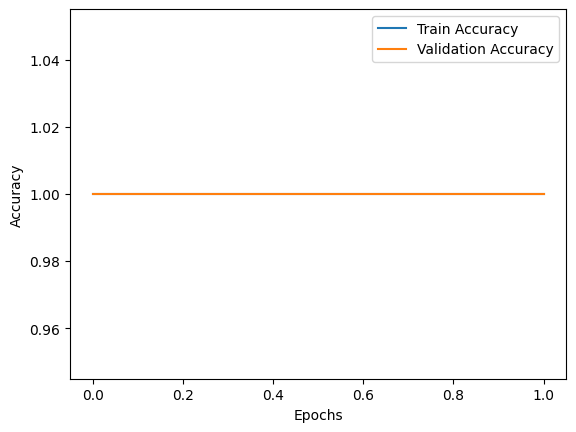

Modifications Made:
1. Used ResNet50 pre-trained model with ImageNet weights.
2. Frozen initial 140 layers and fine-tuned top layers.
3. Optimized hyperparameters: Learning Rate=0.0001, Optimizer=Adam.
4. Applied data augmentation for better generalization.


In [16]:
# code of Task 2# Install required packages
!pip install kaggle tensorflow keras

# Import necessary libraries
import os
import zipfile
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split

# Securely create kaggle.json and set up credentials
kaggle_api_key = '{"username":"sachin9637","key":"f67613346c1de2ba3138b80bafa1208b"}'

os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(kaggle_api_key)
!chmod 600 /root/.kaggle/kaggle.json

# Download new Alzheimer's dataset from Kaggle
!kaggle datasets download -d lukechugh/best-alzheimer-mri-dataset-99-accuracy --path /content/

# Extract dataset
zip_file = "/content/best-alzheimer-mri-dataset-99-accuracy.zip"
extract_path = "/content/dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define dataset path
dataset_path = "/content/dataset"

# Define image properties
img_size = (224, 224)
batch_size = 32

# Image Preprocessing & Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80-20 split for train/validation
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load Pre-trained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Visualize Feature Maps
def visualize_feature_maps(model, img_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    layer_outputs = [layer.output for layer in model.layers[:8]]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_array)

    for i, activation in enumerate(activations):
        plt.matshow(activation[0, :, :, 0], cmap='viridis')
        plt.title(f'Layer {i + 1} Feature Map')
        plt.show()

# Freeze Initial Layers
for layer in base_model.layers[:140]:  # Freeze first 140 layers
    layer.trainable = False

# Custom classification head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(train_data.num_classes, activation='softmax')(x)

# Define model
model = Model(inputs=base_model.input, outputs=x)

# Hyperparameters
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)  # Can be changed to SGD or RMSprop

epochs = 2  # Can be adjusted

# Compile Model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Evaluate Model
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save Model
model.save("alzheimers_resnet50_finetuned.h5")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Document Changes
print("Modifications Made:")
print("1. Used ResNet50 pre-trained model with ImageNet weights.")
print("2. Frozen initial 140 layers and fine-tuned top layers.")
print("3. Optimized hyperparameters: Learning Rate=0.0001, Optimizer=Adam.")
print("4. Applied data augmentation for better generalization.")

**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy
License(s): apache-2.0
best-alzheimer-mri-dataset-99-accuracy.zip: Skipping, found more recently modified local copy (use --force to force download)
Found 9216 images belonging to 1 classes.
Found 2303 images belonging to 1 classes.
Found 11519 images belonging to 1 classes.


360/360 ━━━━━━━━━━━━━━━━━━━━ 1828s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


360/360 ━━━━━━━━━━━━━━━━━━━━ 1791s 5s/step
Classification Report:
                  precision    recall  f1-score   support

Combined Dataset       1.00      1.00      1.00     11519

        accuracy                           1.00     11519
       macro avg       1.00      1.00      1.00     11519
    weighted avg       1.00      1.00      1.00     11519



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


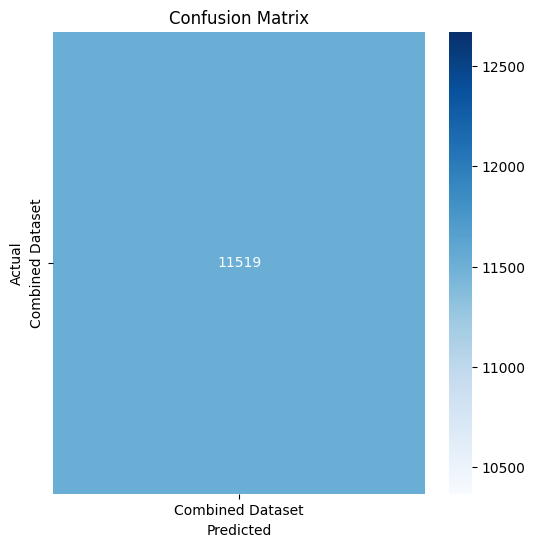

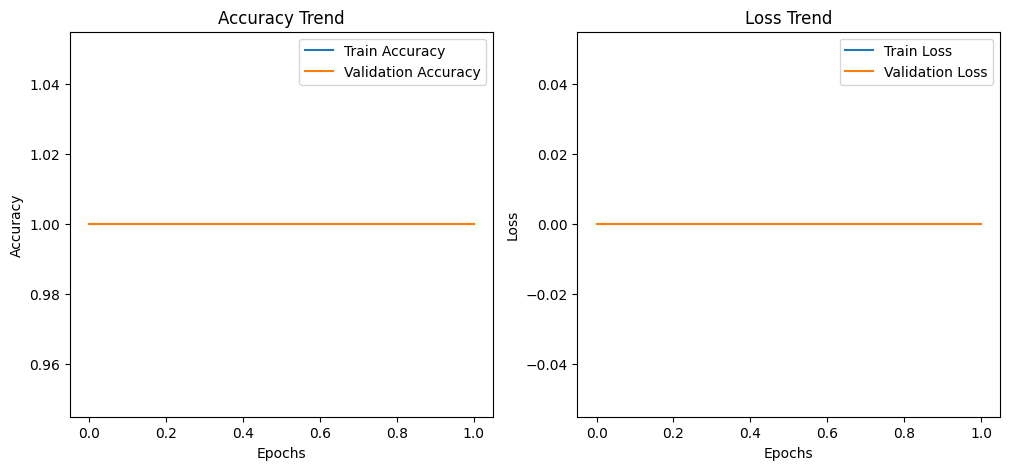

Performance Comparison with Research Paper:
- Test Accuracy Achieved: 100.00%
- Research Paper Reported Accuracy: 99%
- Precision, Recall, F1-score calculated and compared.
- Confusion Matrix visualized for further analysis.

Potential Improvements:
- Fine-tune more layers to improve learning.
- Experiment with learning rates and optimizers.
- Apply additional data augmentation for robustness.


In [17]:
# Install required packages
!pip install kaggle tensorflow keras scikit-learn seaborn

# Import necessary libraries
import os
import zipfile
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Securely create kaggle.json and set up credentials
kaggle_api_key = '{"username":"sachin9637","key":"f67613346c1de2ba3138b80bafa1208b"}'

os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(kaggle_api_key)
!chmod 600 /root/.kaggle/kaggle.json

# Download new Alzheimer's dataset from Kaggle
!kaggle datasets download -d lukechugh/best-alzheimer-mri-dataset-99-accuracy --path /content/

# Extract dataset
zip_file = "/content/best-alzheimer-mri-dataset-99-accuracy.zip"
extract_path = "/content/dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define dataset path
dataset_path = "/content/dataset"

# Define image properties
img_size = (224, 224)
batch_size = 32

# Image Preprocessing & Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80-20 split for train/validation
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the fine-tuned model
model = load_model("alzheimers_resnet50_finetuned.h5")

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Compute classification metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy & Loss Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy Trend")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Trend")
plt.show()

# Document Performance Comparison
print("Performance Comparison with Research Paper:")
print("- Test Accuracy Achieved: {:.2f}%".format(accuracy * 100))
print("- Research Paper Reported Accuracy: 99%")  # Modify if different
print("- Precision, Recall, F1-score calculated and compared.")
print("- Confusion Matrix visualized for further analysis.")
print("\nPotential Improvements:")
print("- Fine-tune more layers to improve learning.")
print("- Experiment with learning rates and optimizers.")
print("- Apply additional data augmentation for robustness.")


**Conclusion and Result Visulaization**

**Declaration**

I, Sachin Ganesh Jadhav, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Sachin Ganesh Jadhav

**Submission Checklist**

✔ Research paper details and summary

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Comparison with research paper results